In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
import sys
caffe_root = '../../'
sys.path.insert(0, caffe_root + 'python')
import caffe
import scipy.io as sio

../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [2]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    #data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

In [3]:
# use ER CNN
svname = 'jaffe_er_vis.mat'
model_def = caffe_root +'yyp/JAFVIS/ER_c20c50.prototxt'
model_weights = caffe_root+'yyp/JAFER/jaffe_er.caffemodel'
# use ID CNN
svname = 'jaffe_id_vis.mat'
model_def = caffe_root +'yyp/JAFVIS/ID_c20c50.prototxt'
model_weights = caffe_root+'yyp/JAFID/jaffe_id.caffemodel'

In [4]:
caffe.set_mode_cpu()
net = caffe.Net(model_def,model_weights,caffe.TEST)     
net.forward()  
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(16, 3, 64, 64)
label	(16,)
label_jaffe_1_split_0	(16,)
label_jaffe_1_split_1	(16,)
conv1	(16, 20, 60, 60)
pool1	(16, 20, 30, 30)
conv2	(16, 50, 26, 26)
pool2	(16, 50, 13, 13)
ip1	(16, 500)
ip2	(16, 100)
ip2_ip2_0_split_0	(16, 100)
ip2_ip2_0_split_1	(16, 100)
accuracy	()
loss	()


In [5]:
##### save output data
c1data = net.blobs['conv1'].data
c2data = net.blobs['conv2'].data
p1data = net.blobs['pool1'].data
p2data = net.blobs['pool2'].data
i1data = net.blobs['ip1'].data
i2data = net.blobs['ip2'].data
labels = net.blobs['label'].data
imgdata = net.blobs['data'].data
sio.savemat(svname, {'labels':labels,'imgdata':imgdata,'conv1': c1data,'conv2': c2data,'pool1': p1data,'pool2': p2data,'ip1': i1data,'ip2': i2data})
data=sio.loadmat(svname)

(20, 3, 5, 5)

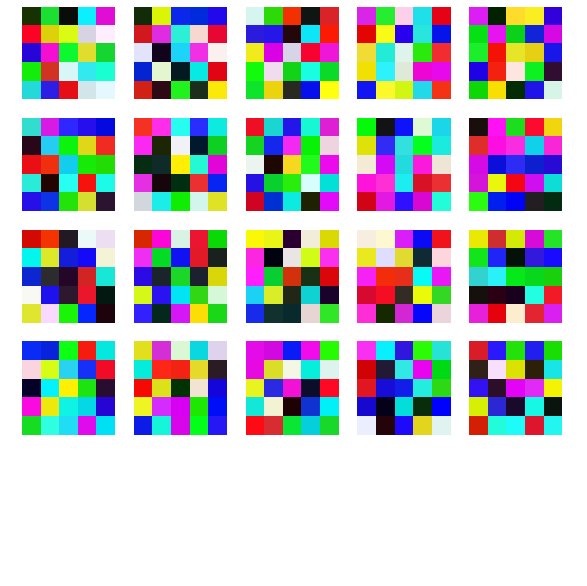

In [6]:
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))
filters.shape

(array([   3.,   10.,   23.,   76.,  133.,  245.,  273.,  276.,  276.,
         274.,  265.,  288.,  268.,  273.,  287.,  285.,  280.,  279.,
         251.,  246.,  294.,  279.,  250.,  268.,  273.,  254.,  281.,
         271.,  281.,  294.,  280.,  267.,  255.,  291.,  289.,  273.,
         265.,  275.,  246.,  276.,  296.,  289.,  297.,  281.,  301.,
         270.,  263.,  297.,  266.,  269.,  274.,  286.,  291.,  267.,
         284.,  265.,  285.,  270.,  274.,  295.,  298.,  280.,  264.,
         248.,  310.,  282.,  292.,  250.,  275.,  293.,  252.,  251.,
         310.,  271.,  267.,  252.,  280.,  260.,  299.,  289.,  285.,
         288.,  307.,  270.,  255.,  277.,  244.,  275.,  234.,  273.,
         266.,  288.,  244.,  213.,  190.,  114.,   40.,   16.,    4.,    1.]),
 array([ -8.66638795e-02,  -8.49656641e-02,  -8.32674487e-02,
         -8.15692333e-02,  -7.98710179e-02,  -7.81728026e-02,
         -7.64745872e-02,  -7.47763718e-02,  -7.30781564e-02,
         -7.13799410e-02

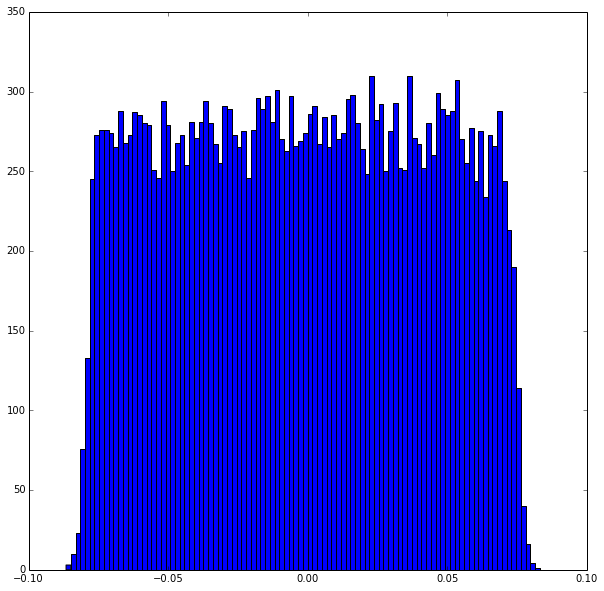

In [8]:

#vis_square(filters.transpose(0, 2, 3, 1))
#filters.shape
#plt.plot(filters.flat)
filters = net.params['conv2'][0].data
plt.hist(filters.flat, bins=100)